In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ipc_area = pd.read_csv('ipc_pse_area_long.csv')
ipc_area_latest = pd.read_csv('ipc_pse_area_long_latest.csv')

ipc_national = pd.read_csv('ipc_pse_national_long.csv')
ipc_national_latest = pd.read_csv('ipc_pse_national_long_latest.csv')

# IPC Area Data

In [3]:
ipc_area.head(15)

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,all,400000,1.00
1,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3+,360000,0.90
2,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,1,0,0.00
3,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,2,40000,0.10
4,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3,180000,0.45
5,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,4,160000,0.40
6,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,5,20000,0.05
7,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,all,400000,1.00
8,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,3+,400000,1.00
9,Apr 2025,PSE,2100000,NaN,Deir al-balah,first projection,2025-05-01,2025-09-30,1,0,0.00


In [4]:
ipc_area_latest

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,all,400000,1.00
1,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3+,360000,0.90
2,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,1,0,0.00
3,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,2,40000,0.10
4,Apr 2025,PSE,2100000,NaN,Deir al-balah,current,2025-04-01,2025-05-31,3,180000,0.45
...,...,...,...,...,...,...,...,...,...,...,...
65,Apr 2025,PSE,2100000,NaN,Rafah,first projection,2025-05-01,2025-09-30,1,0,0.00
66,Apr 2025,PSE,2100000,NaN,Rafah,first projection,2025-05-01,2025-09-30,2,0,0.00
67,Apr 2025,PSE,2100000,NaN,Rafah,first projection,2025-05-01,2025-09-30,3,4500,0.15
68,Apr 2025,PSE,2100000,NaN,Rafah,first projection,2025-05-01,2025-09-30,4,18000,0.60


In [5]:
ipc_area["Area"] = ipc_area["Area"].str.title()
ipc_area["Area"].unique()

array(['Deir Al-Balah', 'Gaza', 'Khan Younis', 'North Gaza', 'Rafah',
       'Northern Governorates', 'Rafah Governorate',
       'Deir Al Balah & Khan Younis Governorates',
       'Deir Al-Balah & Khan Younis Governorates',
       'North Gaza & Gaza Governorates', 'Southern Governorates',
       'Southern Governorate Idps'], dtype=object)

In [6]:
ipc_area.loc[ipc_area["Area"] == "Deir Al Balah & Khan Younis Governorates", "Area"] = "Deir Al-Balah & Khan Younis Governorates"
ipc_area.loc[ipc_area["Area"] == "Rafah", "Area"] = "Rafah Governorate"
ipc_area.loc[ipc_area["Area"] == "Northern Governorates", "Area"] = "Northern West Bank"
ipc_area.loc[ipc_area["Area"] == "Southern Governorates", "Area"] = "Gaza Strip"
ipc_area.loc[ipc_area["Area"] == "Southern Governorate Idps", "Area"] = "Southern Governorate IDPs"

In [7]:
ipc_area.head(15)

,Date of analysis,Country,Total country population,Level 1,Area,Validity period,From,To,Phase,Number,Percentage
0,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,all,400000,1.00
1,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,3+,360000,0.90
2,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,1,0,0.00
3,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,2,40000,0.10
4,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,3,180000,0.45
5,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,4,160000,0.40
6,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,current,2025-04-01,2025-05-31,5,20000,0.05
7,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,first projection,2025-05-01,2025-09-30,all,400000,1.00
8,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,first projection,2025-05-01,2025-09-30,3+,400000,1.00
9,Apr 2025,PSE,2100000,NaN,Deir Al-Balah,first projection,2025-05-01,2025-09-30,1,0,0.00


In [8]:
IPC_Area = ipc_area[~ipc_area["Phase"].isin(["all", "3+"])][["Number", "Phase", "Area", "Date of analysis", "Validity period"]].groupby(["Area", "Phase", "Date of analysis", "Validity period"]).sum()

Deir_al_balah_current = IPC_Area.xs(("Deir Al-Balah", "current"), level=["Area", "Validity period"])
Deir_al_balah_projection = IPC_Area.xs(("Deir Al-Balah", "first projection"), level=["Area", "Validity period"])

Gaza_current = IPC_Area.xs(("Gaza", "current"), level=["Area", "Validity period"])
Gaza_projection = IPC_Area.xs(("Gaza", "first projection"), level=["Area", "Validity period"])

North_Gaza_current = IPC_Area.xs(("North Gaza", "current"), level=["Area", "Validity period"])
North_Gaza_projection = IPC_Area.xs(("North Gaza", "first projection"), level=["Area", "Validity period"])

Rafah_current = IPC_Area.xs(("Rafah Governorate", "current"), level=["Area", "Validity period"])
Rafah_projection = IPC_Area.xs(("Rafah Governorate", "first projection"), level=["Area", "Validity period"])

Khan_Younis_current = IPC_Area.xs(("Khan Younis", "current"), level=["Area", "Validity period"])
Khan_Younis_projection = IPC_Area.xs(("Khan Younis", "first projection"), level=["Area", "Validity period"])

In [9]:
idx = pd.IndexSlice
subset_deir_apr_2025 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["Apr 2025"]], :]
subset_deir_may_2024 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["May 2024"]], :]

subset_gaza = Gaza_current.loc[idx[["2","3","4","5"]], :]

subset_deir_apr_2025 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["Apr 2025"]], :]
subset_deir_may_2024 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["May 2024"]], :]

subset_deir_apr_2025 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["Apr 2025"]], :]
subset_deir_may_2024 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["May 2024"]], :]

subset_deir_apr_2025 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["Apr 2025"]], :]
subset_deir_may_2024 = Deir_al_balah_current.loc[idx[["2","3","4","5"], ["May 2024"]], :]

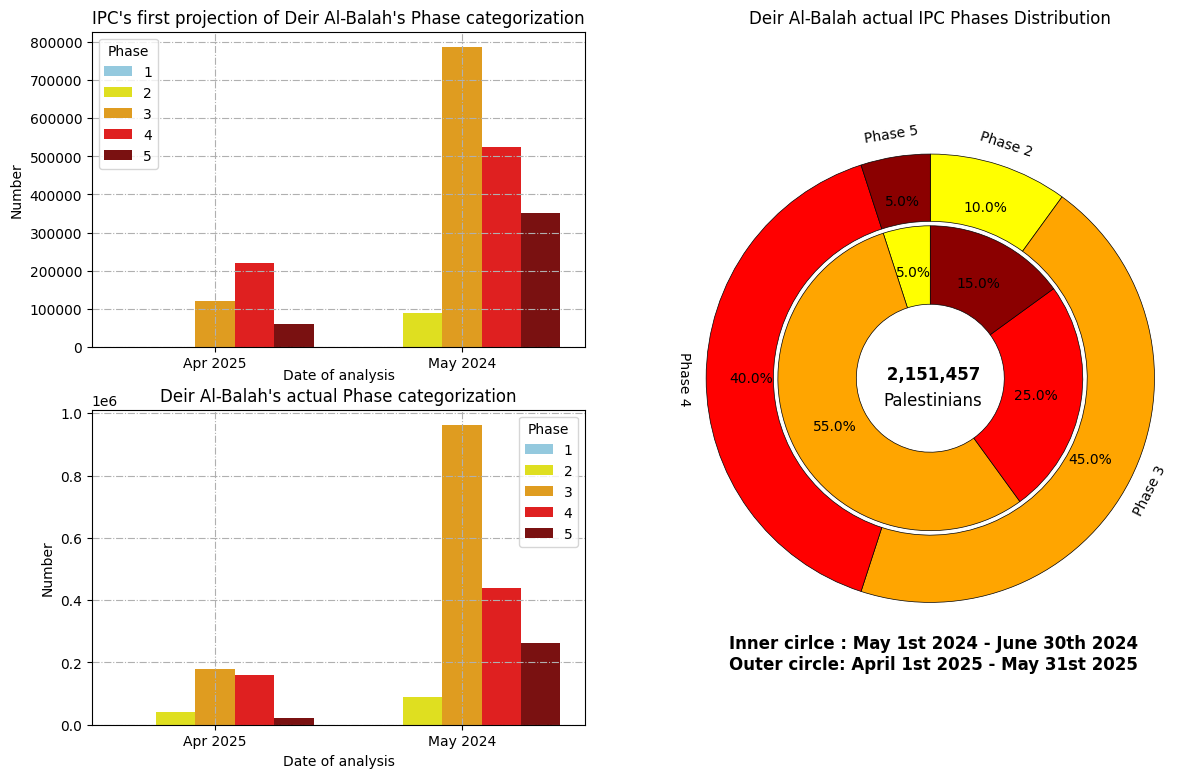

In [10]:
fig = plt.figure(figsize=(14, 9))

ax1 = fig.add_subplot(2, 2, 1)
sns.barplot(data=Deir_al_balah_projection, x="Date of analysis", y="Number",
            palette=["skyblue", "yellow", "orange", "red", "darkred"], hue="Phase", ax=ax1)
ax1.grid(True, linestyle="-.")
ax1.set_title("IPC's first projection of Deir Al-Balah's Phase categorization")
ax1.xaxis.set_label_coords(0.5, -0.07)

ax2 = fig.add_subplot(2, 2, 3)
sns.barplot(data=Deir_al_balah_current, x="Date of analysis", y="Number",
            palette=["skyblue", "yellow", "orange", "red", "darkred"], hue="Phase", ax=ax2)
ax2.grid(True, linestyle="-.")
ax2.set_title("Deir Al-Balah's actual Phase categorization")

ax3 = fig.add_subplot(1, 2, 2)
color_map = {"2": "yellow", "3": "orange", "4": "red", "5": "darkred"}
colors = [color_map.get(phase, "gray") for phase in ["2", "3", "4", "5"]]
labels = [f"Phase {phase}" for phase in subset_deir_apr_2025.index.get_level_values("Phase")]

pie = ax3.pie(data=subset_deir_apr_2025, x=subset_deir_apr_2025["Number"], labels=labels, rotatelabels=True, counterclock=False,
         autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='black', linewidth=0.5),
         radius=1, pctdistance=0.8)

ax3.pie(data=subset_deir_apr_2025, x=subset_deir_may_2024["Number"],
         autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.35, edgecolor='black', linewidth=0.5),
         radius=0.68, pctdistance=0.7)

plt.setp(pie[1], rotation_mode="anchor", ha="center", va="center")
for tx in pie[1]:
    rot = tx.get_rotation()
    tx.set_rotation(rot+90+(1-rot//180)*180)

ax3.set_title("Deir Al-Balah actual IPC Phases Distribution")
ax3.text(0, 0.015, f"{subset_deir_apr_2025["Number"].sum()+subset_deir_may_2024["Number"].sum(): ,}", fontsize=12, ha='center', va='center', color='black', fontweight='bold')
ax3.text(0.01, -0.1, "Palestinians", fontsize=12, ha='center', va='center', color='black')
ax3.text(-0.9, -1.3, "Inner cirlce : May 1st 2024 - June 30th 2024\nOuter circle: April 1st 2025 - May 31st 2025", fontsize=12, color='black', fontweight='bold')
ax3.axis('equal')

plt.show()


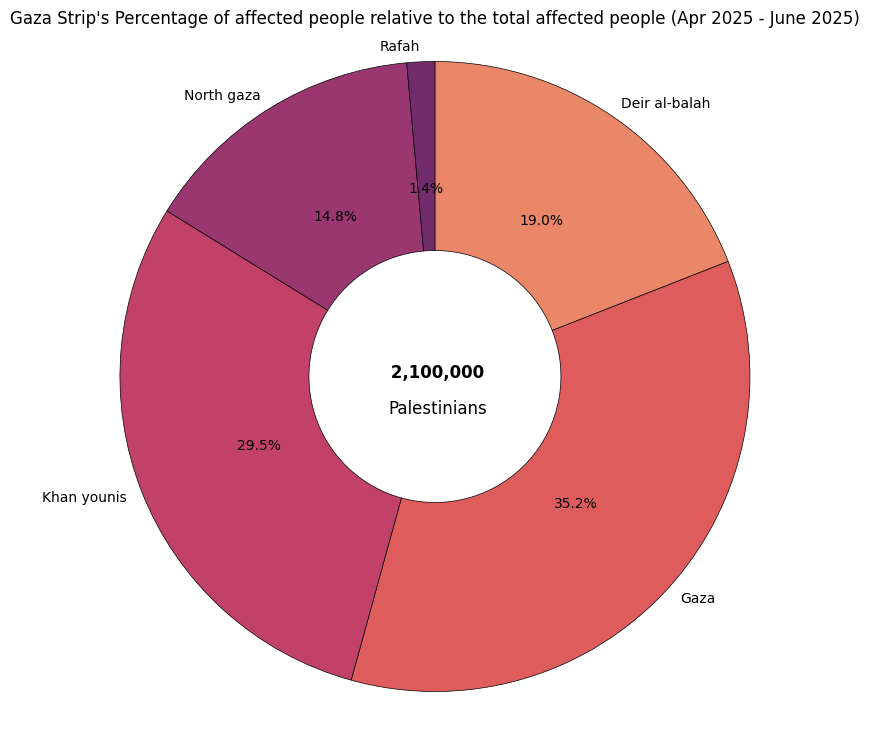

In [11]:
Area_Latest = ipc_area_latest[["Number", "Area", "Phase", "Validity period"]].loc[ipc_area_latest["Phase"] == "all"].loc[ipc_area_latest["Validity period"] == "current"].groupby("Area").sum()

plt.figure(figsize=(10, 9))

labels = [f"{area}" for area in Area_Latest.index.get_level_values("Area")]

plt.pie(data=Area_Latest, x=Area_Latest["Number"], labels=labels, counterclock=False, labeldistance=1.05,
         autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6, edgecolor='black', linewidth=0.5),
         colors=sns.color_palette("flare", n_colors=len(Area_Latest)))

plt.title("Gaza Strip's Percentage of affected people relative to the total affected people (Apr 2025 - June 2025)", loc="Center", pad=5)
plt.text(0, 0.015, f"{Area_Latest["Number"].sum(): ,}", fontsize=12, ha='center', va='center', color='black', fontweight='bold')
plt.text(0.01, -0.1, "Palestinians", fontsize=12, ha='center', va='center', color='black')
plt.axis('equal')

plt.show()

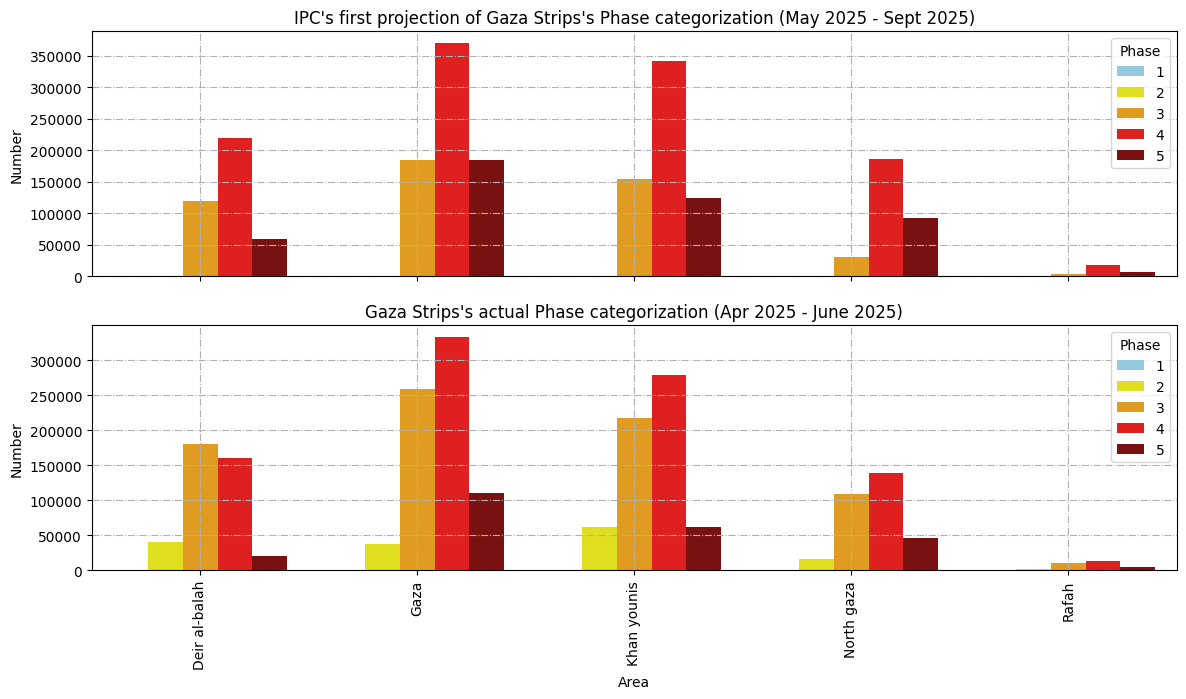

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True)

IPC_Area_Latest = ipc_area_latest[~ipc_area_latest["Phase"].isin(["all", "3+"])][["Number", "Phase", "Area", "Date of analysis", "Validity period"]].groupby(["Area", "Phase", "Date of analysis", "Validity period"]).sum()

IPC_Area_Latest_current = IPC_Area_Latest.xs("current", level="Validity period")
IPC_Area_Latest_projection = IPC_Area_Latest.xs("first projection", level="Validity period")

sns.barplot(data=IPC_Area_Latest_projection, x="Area", y="Number",
            palette=["skyblue", "yellow", "orange", "red", "darkred"], hue="Phase", ax=ax1)
plt.xticks(rotation=90)
ax1.grid(True, linestyle="-.")
ax1.set_title("IPC's first projection of Gaza Strips's Phase categorization (May 2025 - Sept 2025)")
# ax1.xaxis.set_label_coords(0.5, -0.07)
 
sns.barplot(data=IPC_Area_Latest_current, x="Area", y="Number",
            palette=["skyblue", "yellow", "orange", "red", "darkred"], hue="Phase", ax=ax2)
plt.xticks(rotation=90)
ax2.grid(True, linestyle="-.")
ax2.set_title("Gaza Strips's actual Phase categorization (Apr 2025 - June 2025)")

plt.show()